# Проект 2. Разведывательный анализ данных
## Начало анализа

Смотрим первичную структуру датасета

In [832]:

from itertools import combinations

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.core.display import display
from pandas.api.types import CategoricalDtype
from scipy.stats import ttest_ind

%matplotlib inline
sns.set()

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

math_df = pd.read_csv('stud_math.csv')

display(
    (f'samples/rows - {math_df.shape[0]}',
     f'features/columns - {math_df.shape[1]}'),
    math_df.info(),
    math_df.head(),
    '-' * 50,
    math_df.dtypes.value_counts(),
    '-' * 50,
    'Number values',
    math_df.select_dtypes(include=['float64', 'int64']),
    'Object values',
    math_df.select_dtypes(include=['object']),
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

('samples/rows - 395', 'features/columns - 30')

None

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


'--------------------------------------------------'

object     17
float64    12
int64       1
dtype: int64

'--------------------------------------------------'

'Number values'

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
0,18,4.0,4.0,2.0,2.0,0.0,-6.0,4.0,3.0,4.0,3.0,6.0,30.0
1,17,1.0,1.0,1.0,2.0,0.0,-6.0,5.0,3.0,3.0,3.0,4.0,30.0
2,15,1.0,1.0,1.0,2.0,3.0,-6.0,4.0,3.0,2.0,3.0,10.0,50.0
3,15,4.0,2.0,1.0,3.0,0.0,-9.0,3.0,2.0,2.0,5.0,2.0,75.0
4,16,3.0,3.0,1.0,2.0,0.0,-6.0,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,20,2.0,2.0,1.0,2.0,2.0,-6.0,5.0,5.0,4.0,4.0,212.0,45.0
391,17,3.0,1.0,2.0,1.0,0.0,-3.0,2.0,4.0,5.0,2.0,3.0,80.0
392,21,1.0,1.0,1.0,1.0,3.0,-3.0,5.0,5.0,3.0,3.0,3.0,35.0
393,18,3.0,2.0,3.0,1.0,0.0,-3.0,4.0,4.0,1.0,5.0,0.0,50.0


'Object values'

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,NaN,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,NaN,no
1,GP,F,U,GT3,NaN,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,NaN,no,yes,yes,yes,NaN
3,GP,F,U,GT3,T,health,NaN,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,U,LE3,A,services,services,course,NaN,no,yes,yes,no,yes,yes,no,no
391,MS,M,U,LE3,T,services,services,course,mother,no,no,no,no,no,yes,yes,no
392,MS,M,R,GT3,T,other,other,course,NaN,NaN,no,no,no,no,NaN,no,no
393,MS,M,R,LE3,T,services,other,course,mother,no,no,no,NaN,no,yes,yes,no


Данный Dataset содержит 395 записей и 30 колонок.

Нужна предварительная обработка датасета. А именно:
 1. унифицировать названия колонок, для удобной работы с ними
 2. есть пропущенные значения для колонок. Нужно определиться сколько таких колонок, записей и что со всем этим
 делать (удалить, добавить значения по смыслу, распределить поровну или что-то ещё)
 3. Непонятно что делать с "studytime, granular". В описании задачи этой колонки нет и в описание всего 29 колонок -
 возможно она лишняя?
 4. для типовой обработки и конвертации данных лучше подготовить отдельные функции и затем применять их где это
 потребуется.
 5. Несколько колонок содержат числовые значения, но по факту являются категориями (категориальными значениями).
 Например, Medu, Fedu и возможно какие-либо ещё. Будем разбираться индивидуально и на месте


In [833]:
def calculate_outliers(column_name: str,
                       df: pd.DataFrame,
                       _interpolation='midpoint') -> dict:
    """ Calculate outliers from data in the specified column
    """

    q1 = df[column_name].quantile(0.25, interpolation=_interpolation)
    q3 = df[column_name].quantile(0.75, interpolation=_interpolation)
    iqr = q3 - q1
    down = q1 - 1.5 * iqr
    up = q3 + 1.5 * iqr

    return {
        'df': df.loc[~df[column_name].between(down, up)],
        'down': down,
        'up': up,
        'iqr': iqr,
        'q1': q1,
        'q3': q3,
    }


def show_outliers(column_name: str, df: pd.DataFrame) -> None:
    """ Show outliers by specified column
    """
    _outliers_data = calculate_outliers(column_name, df)
    display((
        '-' * 50,
        f'Количество пропущенных записей: {len(math_df[math_df.absences.isnull()])}',
        f'Количество записей с выбросами: {len(_outliers_data["df"])}',
        '-' * 50,
        f'25-й перцентиль: {_outliers_data["q1"]}',
        f'75-й перцентиль: {_outliers_data["q3"]}',
        f'IQR: {_outliers_data["iqr"]}',
        f'Границы выбросов: [{_outliers_data["down"]}, {_outliers_data["up"]}]',
    ))

    # show the outliers on the histogram
    df.loc[df[column_name].index.isin(
        _outliers_data["df"].index)][column_name].hist(label='Outliers')

    plt.legend()


def convert_to_bool(item):
    """ Convert cell value to boolean type in range yes/no
        or return unchanged value
    """
    _value: str = str(item).strip().lower()

    if _value in ('yes', 'no'):
        return _value == 'yes'

    return item


def short_review(column_name: str, df=None):
    """ Brief resume by specified column
    """
    df = df or math_df

    null_values = len(df[column_name].loc[(df[column_name].isnull())])
    more_10 = (df[column_name].value_counts() > 10).sum()

    display(
        pd.DataFrame(df[column_name].value_counts(sort=True,
                                                  ascending=False,
                                                  dropna=False)),
        '-' * 50,
        f'{df[column_name].nunique()} - уникальных значений',
        f'{more_10} - значений, встретившихся в столбце более 10 раз',
        '-' * 50,
        f'{null_values} - всего пустых значений',
        '-' * 50,
    )

    df.loc[:, [column_name]].info()


def normalize_in_percentage(column_name: str, df=None):
    """ Show normalize value counts in percentages
    """
    df = df or math_df

    return pd.DataFrame(df[column_name].value_counts(
        dropna=False, normalize=True)).apply(lambda x: x * 100).round(2)


def get_boxplot(column_name, score_column, df=None, x=15, y=5):
    """ Draw boxplot for specified column name and in the specified dataset
    """
    df = df or math_df
    fig, ax = plt.subplots(figsize=(x, y))

    sns.boxplot(x=column_name,
                y=score_column,
                data=df.loc[df.loc[:, column_name].isin(
                    df.loc[:, column_name].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column_name)
    plt.show()


def get_stat_diff(column_name, score_column):
    """ Calculates statistically significant values
    """
    cols = math_df.loc[:, column_name].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(math_df.loc[math_df.loc[:, column_name] == comb[0], score_column],
                        math_df.loc[math_df.loc[:, column_name] == comb[1], score_column]).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки',
                  column)
            break

# Предварительная обработка датасета
### 1. Исправление названий колонок
Унифицируем все названия колонок - переведём в нижний регистр по единому формату, для дальнешего удобства в
использовании. Так проще всего поступить в данной ситуации.

In [834]:
math_df.columns = [
    'school', 'sex', 'age', 'address', 'fam_size', 'p_status', 'm_edu',
    'f_edu', 'm_job', 'f_job', 'reason', 'guardian', 'travel_time',
    'study_time', 'failures', 'school_sup', 'fam_sup', 'paid', 'activities',
    'nursery', 'study_time_granular', 'higher', 'internet', 'romantic',
    'fam_rel', 'free_time', 'go_out', 'health', 'absences', 'score'
]



### 2. Анализ записей, где есть пропущенные значения в колонках
Предварительно обработаем весь датасет, так чтобы убрать значения, содержащие только пробелы или пустые строки.
Желаемый результат, чтобы на месте пропущенных значений были None

In [835]:
for column in math_df.columns:
    math_df[column] = math_df[column].apply(
        lambda x: x if (str(x).strip() or pd.notnull(x)) else None)

    math_df[column] = math_df[column].apply(lambda x: x
                                            if str(x).strip() else None)

Проверим, какие именно колонки имеют пропущенные значения и определимся, что именно с ними нужно делать дальше

In [836]:
null_stats = pd.DataFrame(data=math_df.isnull().sum(axis=0), columns=['total'])

display(f'Всего колонок из {len(math_df.columns)} возможных:',
        f'с непропущенными значениями:', null_stats[null_stats.total == 0],
        f'с пропущенными значениями:', null_stats[null_stats.total > 0])

'Всего колонок из 30 возможных:'

'с непропущенными значениями:'

,total
school,0
sex,0
age,0


'с пропущенными значениями:'

,total
address,17
fam_size,27
p_status,45
m_edu,3
f_edu,24
m_job,19
f_job,36
reason,17
guardian,31
travel_time,28


Колонок которые не требуют обработки пропущенных значений всего - **3**.

Колонок с пропущенными данными очень много - **27**.

Можно конечно пройтись по ним всем и удалить эти записи. Но, в этом случае мы теряем много информации из датасета,
возможно, полезной информации.


Попробуем вначале выяснить, есть ли такие записи/строки в датасете, где количество пропущенных более 3 и удалим их
как невалидные для дальнейшего анализа данные (на 1 запись 3 пропущенных значения):

In [837]:
math_df['total_null'] = math_df.copy().isnull().sum(axis=1)
display(len(math_df[math_df.total_null >= 3]))
math_df = math_df[math_df.total_null < 3]

69

убираем после расчётов лишнюю колонку

In [838]:
math_df = math_df.drop(['total_null'], axis=1)

C остальными пропущенными значениями нужно подходить индивидуально и решать на месте, что делать с пропущенными данными.



### 3. Разбираемся с колонкой "study_time_granular"
В описании этой колонки нет. Попробуем понять, нужна ли она нам и за что она отвечает.
В переводе "study time granular" означает "детализированное время обучения". В датасете есть 2 похожие колонки, сравним:

<AxesSubplot:>

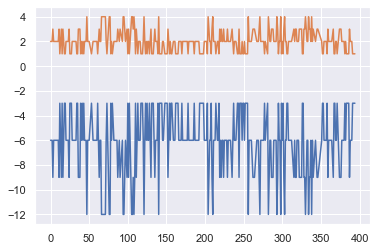

In [839]:
math_df.study_time_granular.plot()
math_df.study_time.plot()

Очень похожи, но с различным масштабом

Проверим гипотезу что значения из "study_time_granular" равны значениям из (study_time * (-3))

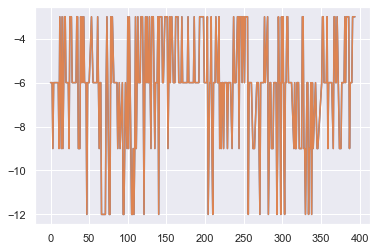

In [840]:
math_df['test_study_time'] = math_df.study_time.apply(lambda x: x * -3)
plt.plot(math_df.test_study_time)
plt.plot(math_df.study_time_granular)

визуально наложились полностью. проверим по каждому значению и корреляцию на графики и вычислениями.

,self,other


' Correlation coefficient: -1.0'

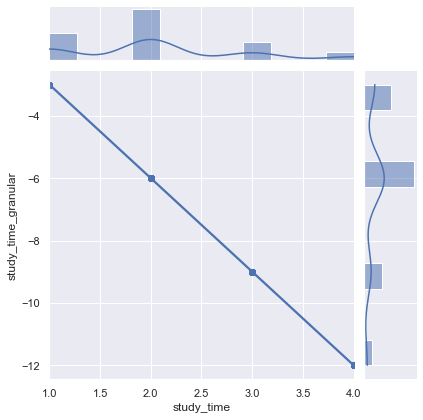

In [841]:
display(
    math_df.study_time.apply(lambda x: x * -3).compare(
        other=math_df.study_time_granular))
display(
    f' Correlation coefficient: {math_df.study_time.corr(other=math_df.study_time_granular).round(5)}'
)
sns.jointplot(x='study_time',
              y='study_time_granular',
              data=math_df,
              kind='reg')

да, эта колонка полностью повторяет math_df.test_study_time.
Соответственно, она должна сильно коррелировать и не нужна в дальнейшем анализе. Проверим корреляцию:
да, так и есть. Удаляем эту колонку и созданную ранее тестовую колонку "test_study_time"

In [842]:
math_df = math_df.drop(['study_time_granular', 'test_study_time'], axis=1)





## Датасет после предварительной обработки
почистили и привели в более или менее нужное состояние.

**NB!** - помним, что в колонках есть пропущенные значения. Учитываем это и разбираемся на месте. При
необходимости сбрасываем индекс, чтобы он шёл по порядку в датасете (после удаления записей появились "дырки" и
обращаться к строкам по индексу не всегда возможно).

In [843]:
math_df = math_df.reset_index(drop=True)
math_df

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,MS,F,18,U,GT3,T,1.0,1.0,other,other,course,mother,NaN,2.0,1.0,no,no,no,yes,yes,yes,NaN,no,1.0,1.0,1.0,5.0,0.0,0.0
322,MS,M,20,U,LE3,A,2.0,2.0,services,services,course,NaN,1.0,2.0,2.0,no,yes,yes,no,yes,yes,no,no,5.0,5.0,4.0,4.0,212.0,45.0
323,MS,M,17,U,LE3,T,3.0,1.0,services,services,course,mother,2.0,1.0,0.0,no,no,no,no,no,yes,yes,no,2.0,4.0,5.0,2.0,3.0,80.0
324,MS,M,18,R,LE3,T,3.0,2.0,services,other,course,mother,3.0,1.0,0.0,no,no,no,NaN,no,yes,yes,no,4.0,4.0,1.0,5.0,0.0,50.0






# Разбор, обработка и анализ данных по каждой колонке

## 1. `school` — аббревиатура школы, в которой учится ученик

In [844]:
math_df['school'] = math_df['school'].astype('category').cat.as_ordered()
short_review('school')

,school
GP,289
MS,37


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'0 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   school  326 non-null    category
dtypes: category(1)
memory usage: 550.0 bytes


Данная колонка содержит только 2 возможных значения. Получается, что для данного датасета этот параметр является
категориальным признаком. конвертируем dtype колонки в category тип.

In [845]:
cat_type = CategoricalDtype(categories=['GP', 'MS'], ordered=True)
math_df['school'] = math_df['school'].astype(cat_type)
math_df['school'].unique()

['GP', 'MS']
Categories (2, object): ['GP' < 'MS']



## 2. `sex` — пол ученика
#### ('F' - женский, 'M' - мужской)

In [846]:
short_review('sex')

,sex
F,178
M,148


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'0 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 326 entries, 0 to 325
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     326 non-null    object
dtypes: object(1)
memory usage: 2.7+ KB


Категориальный признак - конвертируем dtype колонки в category тип и почистим пустые значения

In [847]:
cat_type = CategoricalDtype(categories=['F', 'M'], ordered=True)
math_df['sex'] = math_df['sex'].astype(cat_type)
math_df = math_df.loc[math_df['sex'].notna()]
math_df['sex'].unique()

['F', 'M']
Categories (2, object): ['F' < 'M']



## 3. `age` — возраст ученика
##### (от 15 до 22)


In [848]:
short_review('age')

,age
16,89
17,80
15,68
18,67
19,18
20,3
22,1


'--------------------------------------------------'

'7 - уникальных значений'

'5 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'0 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 325
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     326 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


Параметр "возраст" является числовым параметром. Но, здесь указан чёткий диапазон данных, в котором он должен
варьироваться. Поэтому, по идее, этот признак будет являтся категориальным признаком. Соответсвующим образом и будем
его анализировать

In [849]:
cat_type = CategoricalDtype(categories=[*(range(15, 23, 1))], ordered=True)
math_df['age'] = math_df['age'].astype(cat_type)
math_df = math_df.loc[math_df['age'].notna()]
math_df['age'].unique()

[18, 17, 15, 16, 19, 22, 20]
Categories (7, int64): [15 < 16 < 17 < 18 < 19 < 20 < 22]



## 4. `address` — тип адреса ученика
##### ('U' - городской, 'R' - за городом)

In [850]:
short_review('address')

,address
U,250
R,69
NaN,7


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'7 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326 entries, 0 to 325
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  319 non-null    object
dtypes: object(1)
memory usage: 5.1+ KB


Категориальный признак - конвертируем dtype колонки в category тип и почистим пустые значения

In [851]:
cat_type = CategoricalDtype(categories=['U', 'R'], ordered=True)
math_df['address'] = math_df['address'].astype(cat_type)
math_df = math_df.loc[math_df['address'].notna()]
math_df['address'].unique()

['U', 'R']
Categories (2, object): ['U' < 'R']



## 5. `fam_size` — размер семьи
##### ('LE3' <= 3, 'GT3' >3)

In [852]:
short_review('fam_size')

,fam_size
GT3,216
LE3,84
NaN,19


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'19 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319 entries, 0 to 325
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   fam_size  300 non-null    object
dtypes: object(1)
memory usage: 5.0+ KB


Есть пропущенные значения. Категориальный признак.
Посмотрим, сколько они составляют от общего количества записей в процентах

In [853]:
normalize_in_percentage('fam_size')

,fam_size
GT3,67.71
LE3,26.33
NaN,5.96


5.96% пропущенных значений. И в данной колонке только 2 вида значений. Попробуем не терять значения, половину из
пропущенных значений заполнить "GT3", а вторую "LE3"

In [854]:
null_indexes = list(math_df.index[math_df.fam_size.isnull()])
# 19 записей - нечётное количество,
display(len(null_indexes))
# последнюю запись удаляем,
math_df.drop(index=null_indexes.pop(), inplace=True)
math_df = math_df.reset_index(drop=True)

# остальные распределяем поочерёдно:
column_index = math_df.columns.get_loc('fam_size')

# чётные получают значения "GT3"
for i in null_indexes[::2]:
    math_df.iat[i, column_index] = 'GT3'

#  нечётные получают значения "LE3"
for i in null_indexes[1::2]:
    math_df.iat[i, column_index] = 'LE3'

19

Как категориальный признак - конвертируем dtype колонки в category тип и почистим пустые значения

In [855]:
cat_type = CategoricalDtype(categories=['GT3', 'LE3'], ordered=True)
math_df['fam_size'] = math_df['fam_size'].astype(cat_type)
math_df = math_df.loc[math_df['fam_size'].notna()]
math_df['fam_size'].unique()

['GT3', 'LE3']
Categories (2, object): ['GT3' < 'LE3']



## 6. `p_status` — статус совместного жилья родителей
##### ('T' - живут вместе 'A' - раздельно)
Явно это категория из 2-ух возможных состояний

In [856]:
short_review('p_status')
normalize_in_percentage('p_status')

,p_status
T,247
A,30
NaN,25


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'25 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 317
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  277 non-null    object
dtypes: object(1)
memory usage: 4.7+ KB


,p_status
T,81.79
A,9.93
NaN,8.28


8,28% пропущенных значений. Разделим между 2-мя оставшмися значениями

In [857]:
column_index = math_df.columns.get_loc('p_status')
null_p_status = list(math_df[math_df.p_status.isnull()].index)
display(len(null_p_status))

math_df.drop(index=null_p_status.pop(), inplace=True)
math_df = math_df.reset_index(drop=True)

for i in null_p_status[::2]:
    math_df.iat[i, column_index] = 'T'

for i in null_p_status[1::2]:
    math_df.iat[i, column_index] = 'A'

25

Как категориальный признак - конвертируем dtype колонки в category тип и почистим пустые значения

In [858]:
cat_type = CategoricalDtype(categories=['T', 'A'], ordered=True)
math_df['p_status'] = math_df['p_status'].astype(cat_type)
math_df = math_df.loc[math_df['p_status'].notna()]
math_df['p_status'].unique()

['A', 'T']
Categories (2, object): ['T' < 'A']



## 7. `m_edu` — образование матери
##### (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4-высшее)

In [859]:
short_review('m_edu')

,m_edu
4.0,93
3.0,74
2.0,69
1.0,40
0.0,3


'--------------------------------------------------'

'5 - уникальных значений'

'4 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'0 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   279 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


Здесь, хоть и числовые данные, но мы имеем дело с категориями (категориальный признак). Поэтому будем работать с
этими данными соответсвующим образом. Также, есть 1 запись с пропущенным значением. Удалим её.

In [860]:
cat_type = CategoricalDtype(categories=[*range(5)], ordered=True)
math_df['m_edu'] = math_df['m_edu'].astype(cat_type)
math_df = math_df.loc[math_df['m_edu'].notna()]
math_df['m_edu'].unique()

[4, 1, 3, 2, 0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]



## 8. `f_edu` — образование отца
##### (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [861]:
short_review('f_edu')

,f_edu
2.0,76
4.0,70
3.0,66
1.0,53
NaN,13
0.0,1


'--------------------------------------------------'

'5 - уникальных значений'

'4 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'13 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 279 entries, 0 to 300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   266 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


Тоже категориальный признак. Приведём к этому типу.
Есть явный "выброс" (равный 40), не попадающий в диапазон 0-4.
И есть пустые значения.Нормально распределить думаю не получится.
Поэтому просто удаляем такие записи.

In [862]:
cat_type = CategoricalDtype(categories=[*range(5)], ordered=True)
math_df['f_edu'] = math_df['f_edu'].astype(cat_type)
math_df = math_df.loc[math_df['f_edu'].notna()]
math_df['f_edu'].unique()

[4, 1, 2, 3, 0]
Categories (5, int64): [0 < 1 < 2 < 3 < 4]




## 9. `m_job` — работа матери
##### ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое высшее)

In [863]:
short_review('m_job')

,m_job
other,90
services,71
at_home,41
teacher,32
health,23
NaN,9


'--------------------------------------------------'

'5 - уникальных значений'

'5 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'9 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 0 to 300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   257 non-null    object
dtypes: object(1)
memory usage: 4.2+ KB


12 пропущенных значений удаляем.Категориальный признак - конвертируем dtype колонки в category тип и почистим пустые
 значения

In [864]:
cat_type = CategoricalDtype(
    categories=['teacher', 'health', 'services', 'at_home', 'other'],
    ordered=True)
math_df['m_job'] = math_df['m_job'].astype(cat_type)
math_df = math_df.loc[math_df['m_job'].notna()]
math_df['m_job'].unique()

['at_home', 'health', 'other', 'services', 'teacher']
Categories (5, object): ['teacher' < 'health' < 'services' < 'at_home' < 'other']




## 10. `f_job` — работа отца
##### ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [865]:
short_review('f_job')

,f_job
other,125
services,72
teacher,22
NaN,18
health,11
at_home,9


'--------------------------------------------------'

'5 - уникальных значений'

'4 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'18 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 257 entries, 0 to 300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   239 non-null    object
dtypes: object(1)
memory usage: 4.0+ KB


Категориальный признак. Нужно привести к нужному типу
18 пропущенных значений - удаляем

In [866]:
cat_type = CategoricalDtype(
    categories=['teacher', 'health', 'services', 'at_home', 'other'],
    ordered=True)
math_df['f_job'] = math_df['f_job'].astype(cat_type)
math_df = math_df.loc[math_df['f_job'].notna()]
math_df['f_job'].unique()

['teacher', 'other', 'health', 'services', 'at_home']
Categories (5, object): ['teacher' < 'health' < 'services' < 'at_home' < 'other']




## 11. `reason` — причина выбора школы
##### ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [867]:
short_review('reason')

,reason
course,88
home,58
reputation,57
other,25
NaN,11


'--------------------------------------------------'

'4 - уникальных значений'

'4 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'11 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239 entries, 0 to 300
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  228 non-null    object
dtypes: object(1)
memory usage: 3.7+ KB


11 пропущенных значений - удаляем, категориальный признак - нужно привести к типу category

In [868]:
cat_type = CategoricalDtype(
    categories=['home', 'reputation', 'course', 'other'], ordered=True)
math_df['reason'] = math_df['reason'].astype(cat_type)
math_df = math_df.loc[math_df['reason'].notna()]
math_df['reason'].unique()

['course', 'other', 'home', 'reputation']
Categories (4, object): ['home' < 'reputation' < 'course' < 'other']




## 12. `guardian` — опекун
##### ('mother' - мать, 'father' - отец, 'other' - другое)

In [869]:
short_review('guardian')

,guardian
mother,145
father,52
other,16
NaN,15


'--------------------------------------------------'

'3 - уникальных значений'

'3 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'15 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 299
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  213 non-null    object
dtypes: object(1)
memory usage: 3.6+ KB


15 пропущенных значений - удаляем
Категориальный признак - нужно привести к типу category

In [870]:
cat_type = CategoricalDtype(categories=['mother', 'father', 'other'],
                            ordered=True)
math_df['guardian'] = math_df['guardian'].astype(cat_type)
math_df = math_df.loc[math_df['guardian'].notna()]
math_df['guardian'].unique()

['mother', 'father', 'other']
Categories (3, object): ['mother' < 'father' < 'other']




## 13. `travel_time` — время в пути до школы
##### (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

In [871]:
short_review('travel_time')

,travel_time
1.0,132
2.0,57
3.0,12
NaN,9
4.0,3


'--------------------------------------------------'

'4 - уникальных значений'

'3 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'9 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213 entries, 0 to 299
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   travel_time  204 non-null    float64
dtypes: float64(1)
memory usage: 3.3 KB


Это категориальный признак. Приведём к этому типу.

In [872]:
cat_type = CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)
math_df['travel_time'] = math_df['travel_time'].astype(cat_type)
math_df = math_df.loc[math_df['travel_time'].notna()]
math_df['travel_time'].unique()

[2, 1, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]




## 14. `study_time` — время на учёбу помимо школы в неделю
##### (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)


Это категориальный признак. Приведём к этому типу.

In [873]:
cat_type = CategoricalDtype(categories=[1, 2, 3, 4], ordered=True)
math_df['study_time'] = math_df['study_time'].astype(cat_type)
math_df = math_df.loc[math_df['study_time'].notna()]
math_df['study_time'].unique()

[2, 1, 3, 4]
Categories (4, int64): [1 < 2 < 3 < 4]




## 15. `failures` — количество внеучебных неудач
##### (n, если 1<=n<=3, иначе 0)

In [874]:
short_review('failures')
normalize_in_percentage('failures')

,failures
0.0,160
1.0,24
NaN,8
3.0,7
2.0,5


'--------------------------------------------------'

'4 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'8 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 299
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  196 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


,failures
0.0,78.43
1.0,11.76
NaN,3.92
3.0,3.43
2.0,2.45


Параметр - категория, конвертируем в тип-категорию. Пустых значений мало - удалим.

In [875]:
cat_type = CategoricalDtype(categories=[*range(4)], ordered=True)
math_df['failures'] = math_df['failures'].astype(cat_type)
math_df = math_df.loc[math_df['failures'].notna()]
math_df['failures'].unique()

[0, 3, 1, 2]
Categories (4, int64): [0 < 1 < 2 < 3]




## 16. `school_sup` — дополнительная образовательная поддержка
##### (yes или no)

In [876]:
short_review('school_sup')

,school_sup
no,163
yes,28
NaN,5


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'5 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 0 to 299
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school_sup  191 non-null    object
dtypes: object(1)
memory usage: 3.1+ KB


Категориальный признак - конвертируем dtype колонки в category тип и почистим пустые значения

In [877]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['school_sup'] = math_df['school_sup'].astype(cat_type)
math_df = math_df.loc[math_df['school_sup'].notna()]
math_df['school_sup'].unique()

['yes', 'no']
Categories (2, object): ['yes' < 'no']




## 17. `fam_sup` — семейная образовательная поддержка
##### (yes или no)

In [878]:
short_review('fam_sup')

,fam_sup
yes,110
no,69
NaN,12


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'12 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 299
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   fam_sup  179 non-null    object
dtypes: object(1)
memory usage: 3.0+ KB


Категориальный признак. 12 пропущенных (чётное количество) разделим поровну между 2-мя уникальными значениями для
этой колонки (True, False)

In [879]:
# предварительно сбрасываем индексы из-за предыдущих удалений
math_df = math_df.reset_index(drop=True)
column_index = math_df.columns.get_loc('fam_sup')
null_idx_fam_sup = list(math_df[math_df.fam_sup.isnull()].index)

for idx in null_idx_fam_sup[::2]:
    math_df.iat[idx, column_index] = True

for idx in null_idx_fam_sup[1::2]:
    math_df.iat[idx, column_index] = False

конвертируем dtype колонки в category тип

In [880]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['fam_sup'] = math_df['fam_sup'].astype(cat_type)
math_df = math_df.loc[math_df['fam_sup'].notna()]
math_df['fam_sup'].unique()

['no', 'yes']
Categories (2, object): ['yes' < 'no']




## 18. `paid` — дополнительные платные занятия по математике
##### (yes или no) - (True/False после конвертации)

In [881]:
short_review('paid')

,paid
no,89
yes,73
NaN,17


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'17 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 190
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    162 non-null    object
dtypes: object(1)
memory usage: 2.8+ KB


17 пропущенных значений. Из них 1 удалим, а остальные распределим поровну между yes/no значениями

In [882]:
math_df = math_df.reset_index(drop=True)
column_index = math_df.columns.get_loc('paid')
null_idx_paid = list(math_df[math_df.paid.isnull()].index)

math_df.drop(index=null_idx_paid.pop(), inplace=True)

for idx in null_idx_paid[::2]:
    math_df.iat[idx, column_index] = True

for idx in null_idx_paid[1::2]:
    math_df.iat[idx, column_index] = False

конвертируем dtype колонки в category тип

In [883]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['paid'] = math_df['paid'].astype(cat_type)
math_df = math_df.loc[math_df['paid'].notna()]
math_df['paid'].unique()

['no', 'yes']
Categories (2, object): ['yes' < 'no']




## 19. `activities` — дополнительные внеучебные занятия
##### (yes или no) - (True/False после конвертации)

In [884]:
short_review('activities')

,activities
yes,77
no,76
NaN,9


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'9 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 178
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  153 non-null    object
dtypes: object(1)
memory usage: 2.5+ KB


9 пропущенных значений. Из них 1 удалим, а остальные распределим поровну между yes/no значениями

In [885]:
math_df = math_df.reset_index(drop=True)
column_index = math_df.columns.get_loc('activities')
null_idx_activities = list(math_df[math_df.activities.isnull()].index)

math_df.drop(index=null_idx_activities.pop(), inplace=True)

for idx in null_idx_activities[::2]:
    math_df.iat[idx, column_index] = True

for idx in null_idx_activities[1::2]:
    math_df.iat[idx, column_index] = False

конвертируем dtype колонки в category тип

In [886]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['activities'] = math_df['activities'].astype(cat_type)
math_df = math_df.loc[math_df['activities'].notna()]
math_df['activities'].unique()

['no', 'yes']
Categories (2, object): ['yes' < 'no']




## 20. `nursery` — посещал детский сад
##### (yes или no) - (True/False после конвертации)

In [887]:
short_review('nursery')

,nursery
yes,116
no,31
NaN,6


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'6 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153 entries, 0 to 160
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  147 non-null    object
dtypes: object(1)
memory usage: 2.4+ KB


6 пропущенных значений. Тут просто распределим поровну между yes/no значениями

In [888]:
math_df = math_df.reset_index(drop=True)
column_index = math_df.columns.get_loc('nursery')
null_idx_nursery = list(math_df[math_df.nursery.isnull()].index)

for idx in null_idx_nursery[::2]:
    math_df.iat[idx, column_index] = True

for idx in null_idx_nursery[1::2]:
    math_df.iat[idx, column_index] = False

конвертируем dtype колонки в category тип

In [889]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['nursery'] = math_df['nursery'].astype(cat_type)
math_df = math_df.loc[math_df['nursery'].notna()]
math_df['nursery'].unique()

['yes', 'no']
Categories (2, object): ['yes' < 'no']




## 21. `higher` — хочет получить высшее образование
##### (yes или no) - (True/False после конвертации)

In [890]:
short_review('higher')

,higher
yes,139
no,6
NaN,2


'--------------------------------------------------'

'2 - уникальных значений'

'1 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'2 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 152
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  145 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


2 пропущенных значений. Тут просто распределим поровну между yes/no значениями

In [891]:
math_df = math_df.reset_index(drop=True)
column_index = math_df.columns.get_loc('higher')
null_idx_higher = list(math_df[math_df.higher.isnull()].index)

for idx in null_idx_higher[::2]:
    math_df.iat[idx, column_index] = True

for idx in null_idx_higher[1::2]:
    math_df.iat[idx, column_index] = False

конвертируем dtype колонки в category тип

In [892]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['higher'] = math_df['higher'].astype(cat_type)
math_df = math_df.loc[math_df['higher'].notna()]
math_df['higher'].unique()

['yes', 'no']
Categories (2, object): ['yes' < 'no']




## 22. `internet` — наличие интернета дома
##### (yes или no) - (True/False после конвертации)

In [893]:
short_review('internet')

,internet
yes,110
no,19
NaN,16


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'16 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145 entries, 0 to 146
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  129 non-null    object
dtypes: object(1)
memory usage: 2.3+ KB


16 пропущенных значений. Тут просто распределим поровну между yes/no значениями

In [894]:
math_df = math_df.reset_index(drop=True)
column_index = math_df.columns.get_loc('internet')
null_idx_internet = list(math_df[math_df.internet.isnull()].index)

for idx in null_idx_internet[::2]:
    math_df.iat[idx, column_index] = True

for idx in null_idx_internet[1::2]:
    math_df.iat[idx, column_index] = False

конвертируем dtype колонки в category тип

In [895]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['internet'] = math_df['internet'].astype(cat_type)
math_df = math_df.loc[math_df['internet'].notna()]
math_df['internet'].unique()

['yes', 'no']
Categories (2, object): ['yes' < 'no']




## 23. `romantic` — в романтических отношениях
##### (yes или no) - (True/False после конвертации)

In [896]:
short_review('romantic')

,romantic
no,77
yes,46
NaN,6


'--------------------------------------------------'

'2 - уникальных значений'

'2 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'6 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 1 to 144
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  123 non-null    object
dtypes: object(1)
memory usage: 2.0+ KB


16 пропущенных значений. распределим поровну между True/False значениями

In [897]:
math_df = math_df.reset_index(drop=True)
column_index = math_df.columns.get_loc('romantic')
null_idx_romantic = list(math_df[math_df.romantic.isnull()].index)

for idx in null_idx_romantic[::2]:
    math_df.iat[idx, column_index] = True

for idx in null_idx_romantic[1::2]:
    math_df.iat[idx, column_index] = False

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score


конвертируем dtype колонки в category тип

In [898]:
cat_type = CategoricalDtype(categories=['yes', 'no'], ordered=True)
math_df['romantic'] = math_df['romantic'].astype(cat_type)
math_df = math_df.loc[math_df['romantic'].notna()]
math_df['romantic'].unique()

['no', 'yes']
Categories (2, object): ['yes' < 'no']




## 24. `fam_rel` — семейные отношения
##### (от 1 - очень плохо до 5 - очень хорошо)

In [899]:
short_review('fam_rel')

,fam_rel
4.0,59
5.0,28
3.0,19
NaN,9
2.0,6
1.0,2


'--------------------------------------------------'

'5 - уникальных значений'

'3 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'9 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 0 to 128
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   fam_rel  114 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


Категориальный признак. Приведём к типу category. Удалим пустые записи из датасета.

In [900]:
cat_type = CategoricalDtype(categories=[*range(1, 6, 1)], ordered=True)
math_df['fam_rel'] = math_df['fam_rel'].astype(cat_type)
math_df = math_df.loc[math_df['fam_rel'].notna()]
math_df['fam_rel'].unique()

[5, 4, 3, 1, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]




## 25. `free_time` — свободное время после школы
##### (от 1 - очень мало до 5 - очень много)

In [901]:
short_review('free_time')

,free_time
3.0,39
4.0,36
2.0,16
5.0,10
1.0,10
NaN,3


'--------------------------------------------------'

'5 - уникальных значений'

'3 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'3 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 128
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   free_time  111 non-null    float64
dtypes: float64(1)
memory usage: 1.8 KB


Есть 3 пропущенных значения, которые проще всего удалить из датасета. Остальные значения попадают в описанный
диапазон данных. Сам параметр представляем является категориальным признаком.

In [902]:
cat_type = CategoricalDtype(categories=[*range(1, 6, 1)], ordered=True)
math_df['free_time'] = math_df['free_time'].astype(cat_type)
math_df = math_df.loc[math_df['free_time'].notna()]
math_df['free_time'].unique()

[3, 4, 1, 5, 2]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]




## 26. `go_out` — проведение времени с друзьями
##### (от 1 - очень мало до 5 - очень мого)

In [903]:
short_review('go_out')

,go_out
3.0,37
2.0,30
4.0,24
5.0,12
1.0,5
NaN,3


'--------------------------------------------------'

'5 - уникальных значений'

'4 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'3 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 0 to 128
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   go_out  108 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Параметр представляем является категориальным признаком.
3 пустых значений - проще удалить

In [904]:
cat_type = CategoricalDtype(categories=[*range(1, 6, 1)], ordered=True)
math_df['go_out'] = math_df['go_out'].astype(cat_type)
math_df = math_df.loc[math_df['go_out'].notna()]
math_df['go_out'].unique()

[3, 2, 4, 1, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]




## 27. `health` — текущее состояние здоровья
##### (от 1 - очень плохо до 5 - очень хорошо)

In [905]:
short_review('health')

,health
5.0,31
3.0,23
4.0,21
2.0,15
1.0,14
NaN,4


'--------------------------------------------------'

'5 - уникальных значений'

'5 - значений, встретившихся в столбце более 10 раз'

'--------------------------------------------------'

'4 - всего пустых значений'

'--------------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108 entries, 0 to 128
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  104 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


Признак - категория. 4 пустых значений - удаляем. Уникальные значения не выходят за описанный в задании диапазон.

In [906]:
cat_type = CategoricalDtype(categories=[*range(1, 6, 1)], ordered=True)
math_df['health'] = math_df['health'].astype(cat_type)
math_df = math_df.loc[math_df['health'].notna()]
math_df['health'].unique()

[3, 5, 1, 2, 4]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]




## 28. `absences` — количество пропущенных занятий

Это числовой параметр. Посмотрим распределение значений на гистограмме и возможные выбросы
Посмотрим и удалим выбросы, а также, удалим записи с пустыми значениями.

('--------------------------------------------------',
 'Количество пропущенных записей: 4',
 'Количество записей с выбросами: 7',
 '--------------------------------------------------',
 '25-й перцентиль: 0.0',
 '75-й перцентиль: 8.0',
 'IQR: 8.0',
 'Границы выбросов: [-12.0, 20.0]')

count    100.000000
mean       5.600000
std        6.888726
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       40.000000
Name: absences, dtype: float64

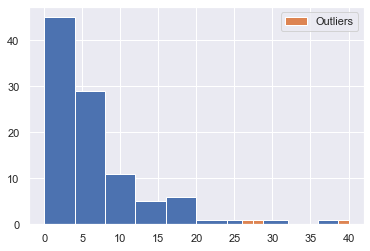

In [907]:
math_df.absences.hist()
show_outliers('absences', math_df)
display(math_df.absences.describe())

Есть и пустые значения и выбросы. Удалим такие записи

In [908]:
math_df = math_df[math_df.absences.notna()]
outliers_data = calculate_outliers('absences', math_df)
math_df = math_df[~math_df.index.isin(outliers_data['df'].index)]

Проверяем ещё раз. Пустых значений нет, а вот выбросы снова есть, правда в меньшем масштабе.
Чистим и их

('--------------------------------------------------',
 'Количество пропущенных записей: 0',
 'Количество записей с выбросами: 7',
 '--------------------------------------------------',
 '25-й перцентиль: 0.0',
 '75-й перцентиль: 6.0',
 'IQR: 6.0',
 'Границы выбросов: [-9.0, 15.0]')

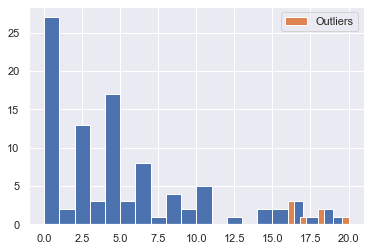

In [909]:
math_df.absences.hist(bins=20)
show_outliers('absences', math_df)
outliers_data = calculate_outliers('absences', math_df)
math_df = math_df[~math_df.index.isin(outliers_data['df'].index)]

Снова проверяем

('--------------------------------------------------',
 'Количество пропущенных записей: 0',
 'Количество записей с выбросами: 0',
 '--------------------------------------------------',
 '25-й перцентиль: 0.0',
 '75-й перцентиль: 6.0',
 'IQR: 6.0',
 'Границы выбросов: [-9.0, 15.0]')

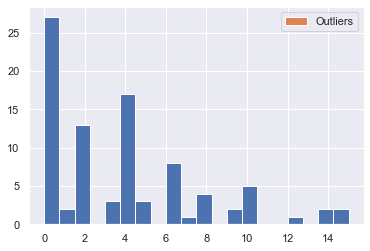

In [910]:
math_df.absences.hist(bins=20)
show_outliers('absences', math_df)

Отлично, вроде больше ничего не осталось исправлять с данными. Здравый смысл подсказывает, что это правильное
распределение, так как чем чаще ученик пропускает занятие, тем меньше таких будет учеников. А большинство учеников
будут стараться и не пропускать занятия (хотя всё возможно)




## 29. `score` — баллы по госэкзамену по математике

Это числовой параметр. Посмотрим распределение значений на гистограмме и возможные выбросы
Посмотрим и удалим выбросы, а также, удалим записи с пустыми значениями.

count    89.000000
mean     52.415730
std      21.638985
min       0.000000
25%      40.000000
50%      55.000000
75%      65.000000
max      95.000000
Name: score, dtype: float64

('--------------------------------------------------',
 'Количество пропущенных записей: 0',
 'Количество записей с выбросами: 8',
 '--------------------------------------------------',
 '25-й перцентиль: 40.0',
 '75-й перцентиль: 65.0',
 'IQR: 25.0',
 'Границы выбросов: [2.5, 102.5]')

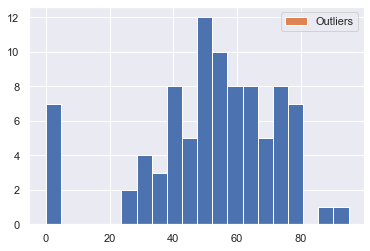

In [911]:
display(math_df.score.describe())
math_df.score.hist(bins=20)
show_outliers('score', math_df)

Есть и выбросы и пропущенные значения. Чистим и ещё раз проверяем.

In [912]:
math_df = math_df[math_df['score'].notna()]

outliers_data = calculate_outliers('score', math_df)
math_df = math_df[~math_df.index.isin(outliers_data['df'].index)]

count    82.000000
mean     56.890244
std      15.843374
min      25.000000
25%      45.000000
50%      55.000000
75%      70.000000
max      95.000000
Name: score, dtype: float64

('--------------------------------------------------',
 'Количество пропущенных записей: 0',
 'Количество записей с выбросами: 0',
 '--------------------------------------------------',
 '25-й перцентиль: 45.0',
 '75-й перцентиль: 70.0',
 'IQR: 25.0',
 'Границы выбросов: [7.5, 107.5]')

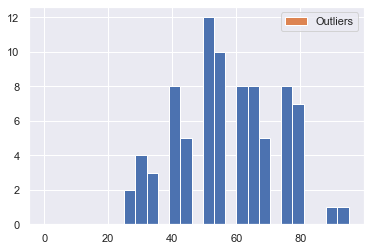

In [913]:
display(math_df.score.describe())
math_df.score.hist(bins=20)
show_outliers('score', math_df)

Всё хорошо. Теперь посмотрим, какой получился у нас в итоге датасет.

In [914]:
display(
    '-' * 50,
    f'samples/rows - {math_df.shape[0]}',
    f'features/columns - {math_df.shape[1]}',
    '-' * 50,
    math_df.info(),
    math_df.dtypes.values,
)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 128
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   school       82 non-null     category
 1   sex          82 non-null     category
 2   age          82 non-null     category
 3   address      82 non-null     category
 4   fam_size     82 non-null     category
 5   p_status     82 non-null     category
 6   m_edu        82 non-null     category
 7   f_edu        82 non-null     category
 8   m_job        82 non-null     category
 9   f_job        82 non-null     category
 10  reason       82 non-null     category
 11  guardian     82 non-null     category
 12  travel_time  82 non-null     category
 13  study_time   82 non-null     category
 14  failures     82 non-null     category
 15  school_sup   82 non-null     category
 16  fam_sup      82 non-null     category
 17  paid         82 non-null     category
 18  activities   82 non-null     ca

'--------------------------------------------------'

'samples/rows - 82'

'features/columns - 29'

'--------------------------------------------------'

None

array([CategoricalDtype(categories=['GP', 'MS'], ordered=True),
       CategoricalDtype(categories=['F', 'M'], ordered=True),
       CategoricalDtype(categories=[15, 16, 17, 18, 19, 20, 21, 22], ordered=True),
       CategoricalDtype(categories=['U', 'R'], ordered=True),
       CategoricalDtype(categories=['GT3', 'LE3'], ordered=True),
       CategoricalDtype(categories=['T', 'A'], ordered=True),
       CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True),
       CategoricalDtype(categories=[0, 1, 2, 3, 4], ordered=True),
       CategoricalDtype(categories=['teacher', 'health', 'services', 'at_home', 'other'], ordered=True),
       CategoricalDtype(categories=['teacher', 'health', 'services', 'at_home', 'other'], ordered=True),
       CategoricalDtype(categories=['home', 'reputation', 'course', 'other'], ordered=True),
       CategoricalDtype(categories=['mother', 'father', 'other'], ordered=True),
       CategoricalDtype(categories=[1, 2, 3, 4], ordered=True),
       Categorical

In [915]:
math_df

,school,sex,age,address,fam_size,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,travel_time,study_time,failures,school_sup,fam_sup,paid,activities,nursery,higher,internet,romantic,fam_rel,free_time,go_out,health,absences,score
0,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,3,4.0,30.0
1,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,5,4.0,50.0
2,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,yes,yes,yes,yes,yes,no,5,4,2,5,10.0,75.0
3,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,6.0,30.0
5,GP,F,15,U,LE3,T,4,4,teacher,health,reputation,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,3,3,3,2,0.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,MS,F,18,U,GT3,T,3,3,other,other,home,mother,1,2,0,no,no,yes,no,yes,yes,yes,yes,4,1,3,1,0.0,75.0
124,MS,M,18,R,GT3,A,2,1,other,other,other,mother,2,1,0,no,no,no,yes,no,yes,yes,yes,4,4,3,5,5.0,35.0
125,MS,F,18,R,GT3,T,4,4,teacher,at_home,reputation,mother,3,1,0,no,yes,yes,yes,yes,yes,yes,yes,4,4,3,5,7.0,30.0
127,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,yes,no,yes,yes,yes,no,4,3,4,1,0.0,40.0





# Корреляционный анализ

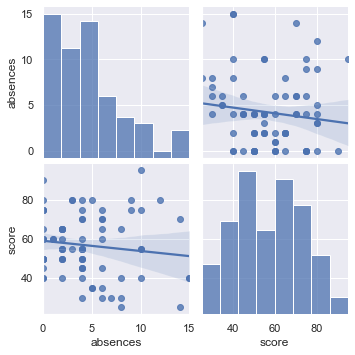

In [916]:
sns.pairplot(math_df, kind='reg')

In [917]:
corr = math_df.corr()
correlations_score = pd.DataFrame(corr['score'].sort_values())
correlations_score

,score
absences,-0.128059
score,1.000000


Тепловая карта корреляций по колонкам значений

<AxesSubplot:>

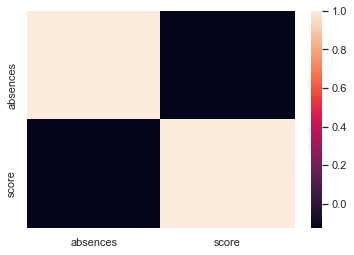

In [918]:
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

Матрица коэффициентов корреляций по колонкам значений

In [919]:
corr.style.background_gradient(cmap='coolwarm', axis=None)\
    .set_precision(3)\
    .set_properties(**{'font-size': '5pt'})\
    .set_table_styles([{'selector': 'th', 'props': [('font-size', '5pt')]}])

,absences,score
absences,1.000,-0.128
score,-0.128,1.000


Коэффициент корреляции между score и absences (2 числовых поля в датасете) мал и показывает обратную зависимость этих
 параметров. Регрессионный график показывает нормальное распределение значений. Можно использовать его в дальнейшем
 анализе.





# Анализ номинативных переменных
получаем номинативные признаки - это у нас получаются все остальные категориальные поля

In [920]:
categories = [
    x for x in math_df.columns if math_df[x].dtype.name == 'category'
]
print(*enumerate(categories), sep='\n')

(0, 'school')
(1, 'sex')
(2, 'age')
(3, 'address')
(4, 'fam_size')
(5, 'p_status')
(6, 'm_edu')
(7, 'f_edu')
(8, 'm_job')
(9, 'f_job')
(10, 'reason')
(11, 'guardian')
(12, 'travel_time')
(13, 'study_time')
(14, 'failures')
(15, 'school_sup')
(16, 'fam_sup')
(17, 'paid')
(18, 'activities')
(19, 'nursery')
(20, 'higher')
(21, 'internet')
(22, 'romantic')
(23, 'fam_rel')
(24, 'free_time')
(25, 'go_out')
(26, 'health')


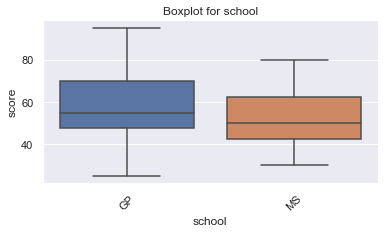

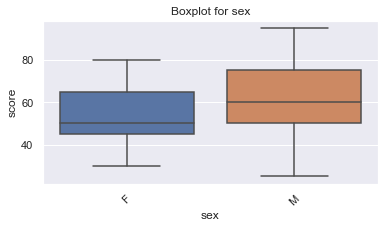

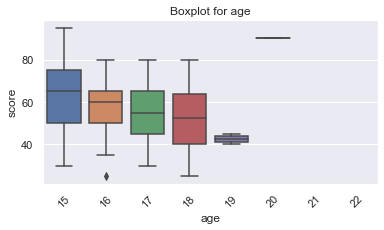

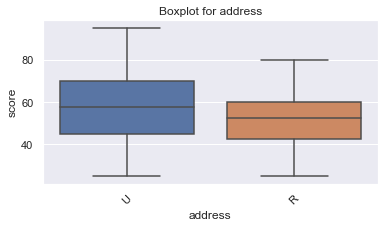

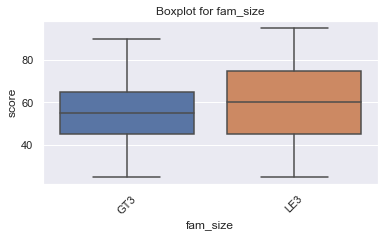

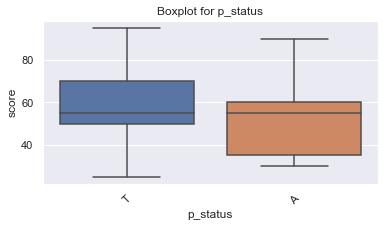

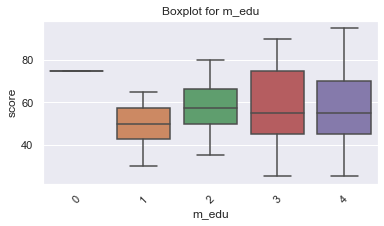

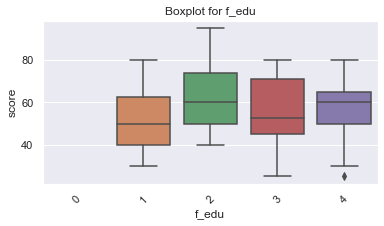

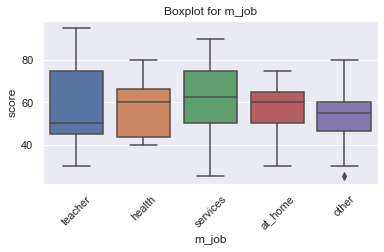

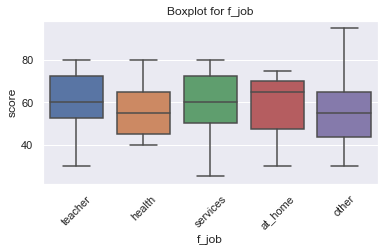

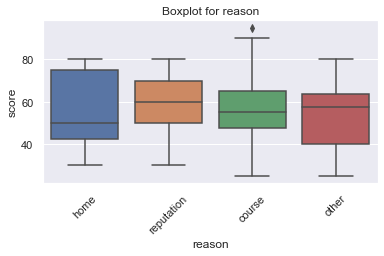

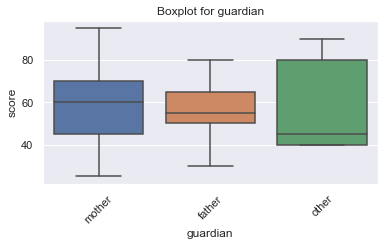

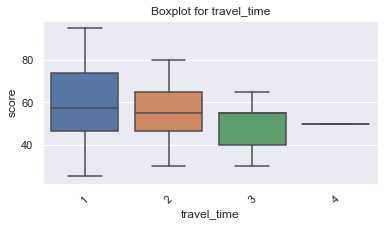

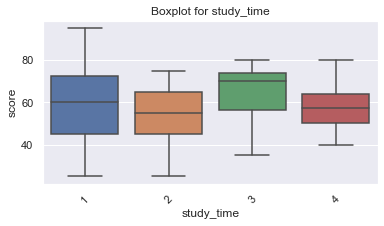

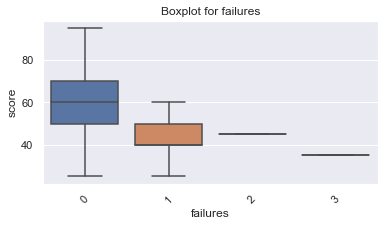

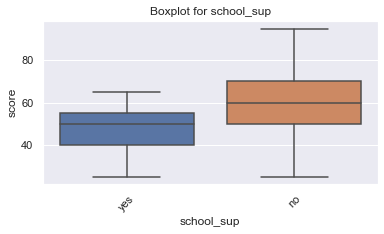

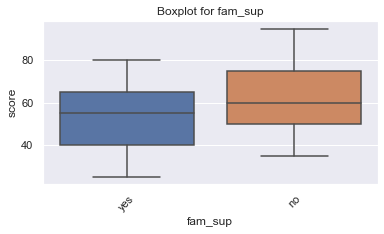

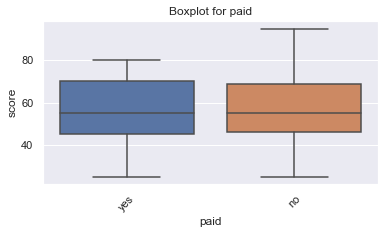

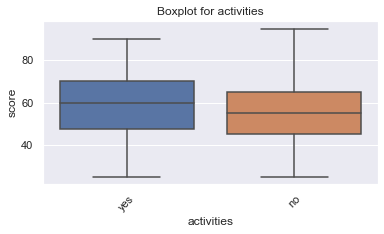

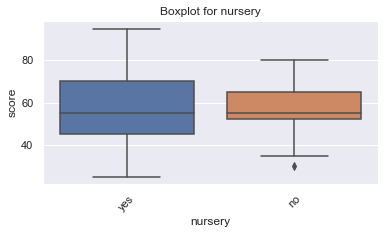

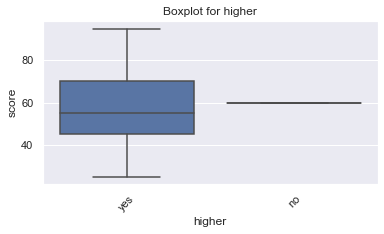

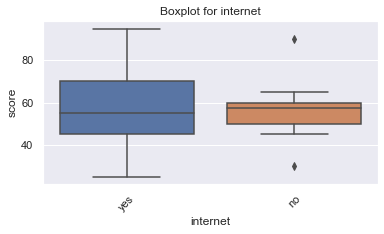

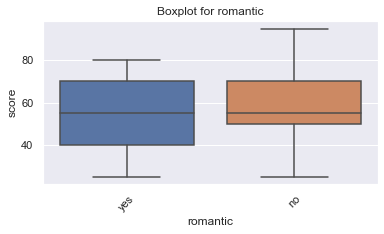

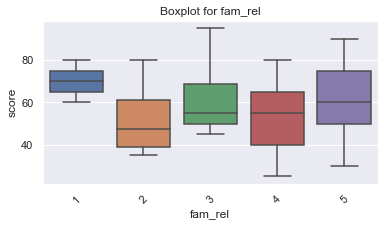

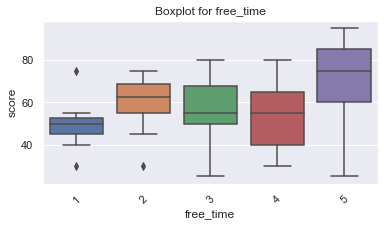

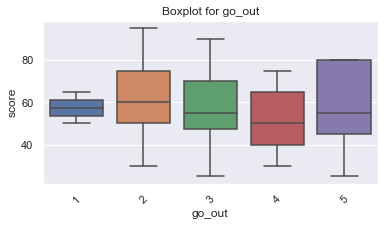

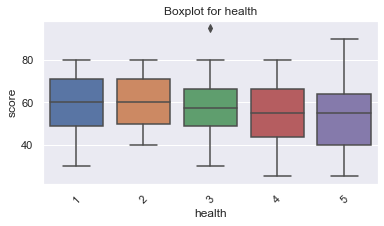

In [921]:
for column in categories:
    get_boxplot(column, 'score', x=6, y=3)

Наблюдаемые визуально особенности влияния категориальных параметров на целевой параметр score:
 - параметр `age`, после 19 лет учащегося резко повышает `score`. Возможно, более старшие ученики сдают математику
 более успешно
 - отсутствие образование и матери и отца (`m_edu`, `f_edu`) показывает что у ребёнка нет шансов сдать успешно математику
 . Папа у Васи не учил математику и видимо помочь ему не может :(
 - Если время до дома занимает более часа (`travel_time` == 4), то на возможность сдать математику это влияет тоже очень плохо
 - большое количество внеучебных неудач (`failures`) резко негативно влияет возможность сдать математику успешно. После 2 неудач, сдать на положительную оценку очень сложно
 - Желание получить высшее образование (`higher`) играет ключевую роль в получении хороших отметок. Отсутствие фактически
 закрывает перед учеником такую возможность
 - Отсуствие интернета (`internet`) сужает возможность сдать успешно, хотя, судя по выбросам на графике, всегда есть место гениям и "уникумам"
 - Большое количество свободного времени (`free_time`) позволяет сдавать математику более успешно

Остальные параметры слабо или никак не влияют на целевой параметр score.

Но, прежде чем делать окончательные выводы, найдём статистически значимые поля с помощью теста Стъюдента


###  тест Стьюдента (T-Test)

In [922]:
categories = [
    x for x in math_df.columns if math_df[x].dtype.name == 'category'
]
for column in categories:
    get_stat_diff(column, 'score')

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки study_time
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки school_sup
Найдены статистически значимые различия для колонки fam_sup


/Users/Oleg/.conda/envs/SkillFactory/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3621: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Oleg/.conda/envs/SkillFactory/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Оставим колонки данных в датасете значимые для обучения нашей будущей модели

In [923]:
math_df_for_model = math_df.loc[:, [
    'sex', 'study_time', 'failures', 'school_sup', 'fam_sup', 'absences'
]]

math_df_for_model.head()

,sex,study_time,failures,school_sup,fam_sup,absences
0,F,2,0,no,yes,4.0
1,F,2,0,no,yes,4.0
2,M,2,0,no,yes,10.0
3,F,2,0,yes,yes,6.0
5,F,2,0,no,yes,0.0




# Выводы

В результате EDA для анализа влияния различных параметров школьников на успеваемость в дальнейшей учебе в ВУЗе, были
получены следующие выводы:

- В данных много пустых значений - все, кроме 3 столбцов (`school`, `sex`, `age`) имели пропуски или пустые значения в данных.
- Выбросы найдены только в столбце с количество пропущенных занятий и для столбца "образование отца" значение
выходило за описанный в задаче диапазон значений. Всё это позволяет сказать о том, что данные были сильно
"загрязнены". После очистки датасета и приведения данных к определённым типам данных (category, float64), осталось 82
 записи из 395 первоначальных (20,759% от первоначального количества - потери).
- Отрицальная корреляция параметра `absences` и `score` может говорить о том, что большое количество пропусков
занятий плохо влияет на конечную оценку по математике. Что, в приниципе, и неудивительно.
- Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это `sex`, `study_time`, `failures`, `school_sup`, `fam_sup`, `absences`.

**От себя:**
- Так как данные были "грязными" и мы потеряли по сути более 4/5 части данных, то дальнейшее обучение модели
маловероятно и этих данных скорее всего будет недостаточно.

**Что делать? Мои предложения:**

Можно конечно же было "забить" существующий датасет различными данными (min, max, mean, median) по каждому столбцу.
 Но, во-первых это было бы нечестно для последующей работы и по отношению к тому, кто её будет делать. А во-вторых,
 по сути, мы здесь имеем с категориями и предложение выше, думаю, не сработает. В третьих, первоначальное количество
 записей было недостаточно (395). Обычно обучение начинается от 1000-10000 и до бесконечного количества записей

Так что варианта 2 - плохой и совсем плохой:
  1. Взять датасет побольше и такого же качества. На большей выборке сделать анализ и попытаться получить минимум
  датасет от 1000 записей с "чистыми" данными.
  2. Если других вариантов нет и есть только этот датасет, то признать, что проект невозможно сделать на должном
  уровне и качестве, и закрыть его, не тратя на него деньги и ресурсы в дальнейшем.

По-любому найдётся вариант ещё.
